## Import the required Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the Given Dataset

In [11]:
df = pd.read_csv('melb_data.csv')

# Show the top five rows
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Data Validation

In [12]:
# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())


Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64
              Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3

In [16]:
# Example: Drop rows with missing values
df = df.dropna()
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,3757.0,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
12206,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,3016.0,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
12207,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
12209,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


In [18]:
# Example: Select features for modeling
selected_features = ['Rooms', 'Distance', 'Bathroom', 'Landsize', 'BuildingArea', 'Price']
df_model = df[selected_features]
df_model

,Rooms,Distance,Bathroom,Landsize,BuildingArea,Price
1,2,2.5,1.0,156.0,79.00,1035000.0
2,3,2.5,2.0,134.0,150.00,1465000.0
4,4,2.5,1.0,120.0,142.00,1600000.0
6,3,2.5,2.0,245.0,210.00,1876000.0
7,2,2.5,1.0,256.0,107.00,1636000.0
...,...,...,...,...,...,...
12205,3,35.5,2.0,972.0,149.00,601000.0
12206,3,6.8,1.0,179.0,115.00,1050000.0
12207,1,6.8,1.0,0.0,35.64,385000.0
12209,2,4.6,1.0,0.0,61.60,560000.0


## Data Modelling

In [25]:
# Features and target variable
X = df[['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 199041253402.592


## Univariate Analysis

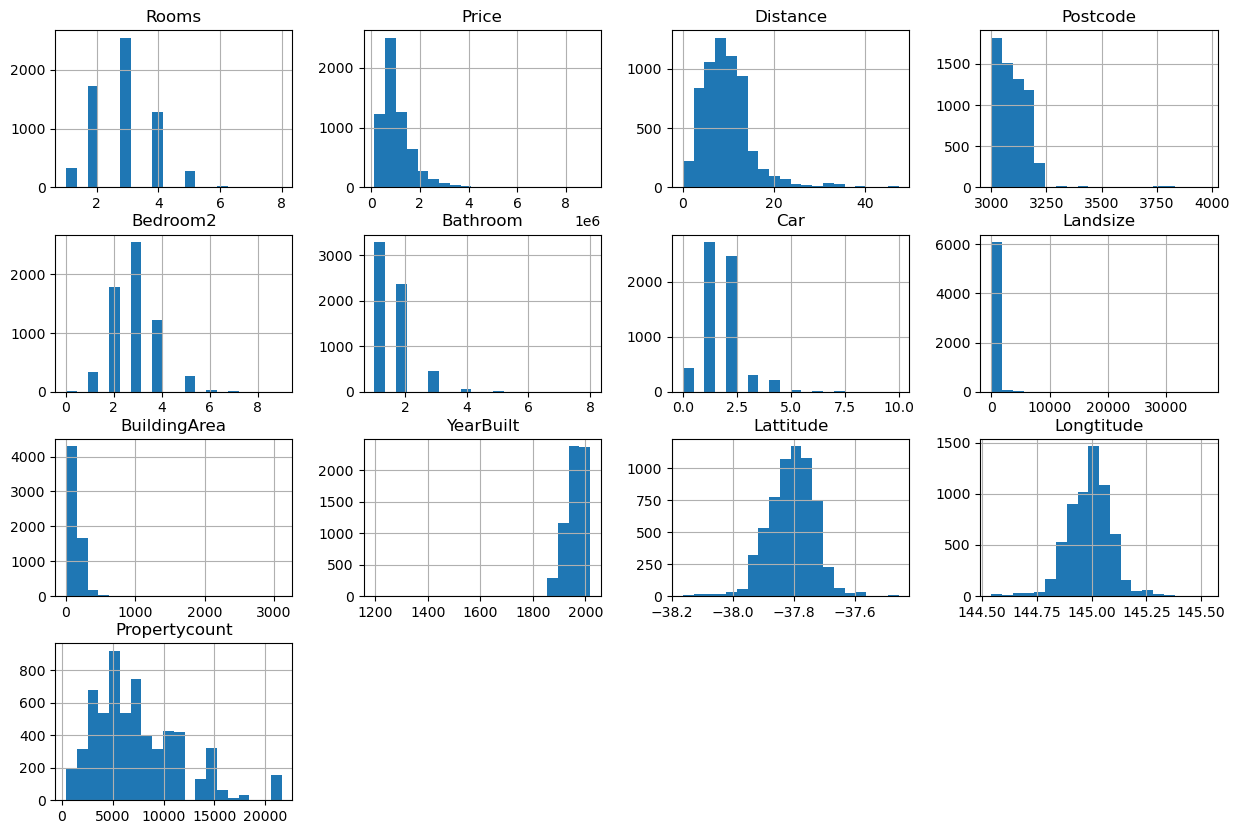

In [32]:
# Plotting histograms for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()


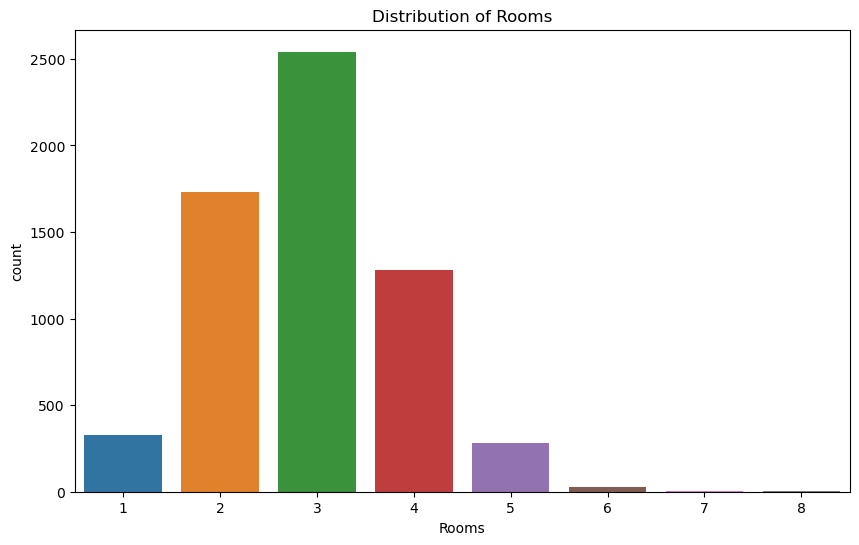

In [27]:
# Univariate analysis for 'Rooms'
plt.figure(figsize=(10, 6))
sns.countplot(x='Rooms', data=df)
plt.title('Distribution of Rooms')
plt.show()


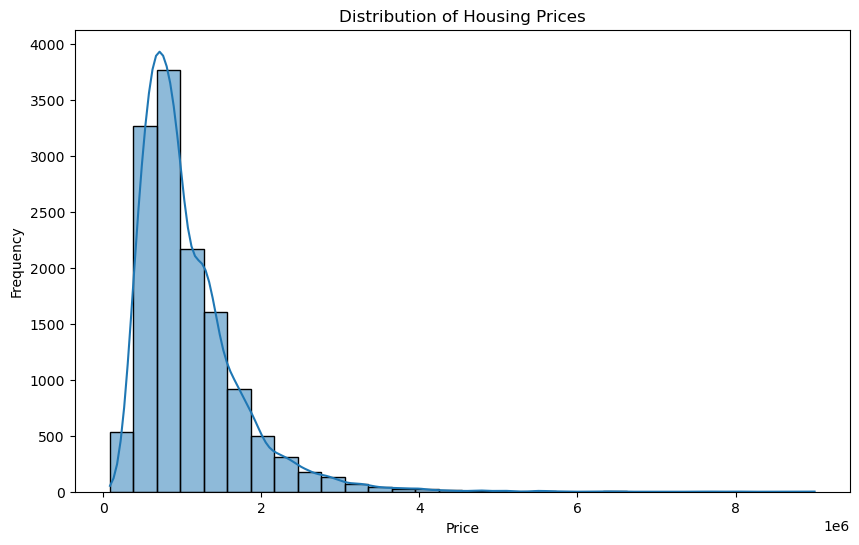

In [5]:

# You may need to preprocess the data, handle missing values, and encode categorical variables.

# Data Visualization - Univariate Analysis
# Let's assume 'price' is the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



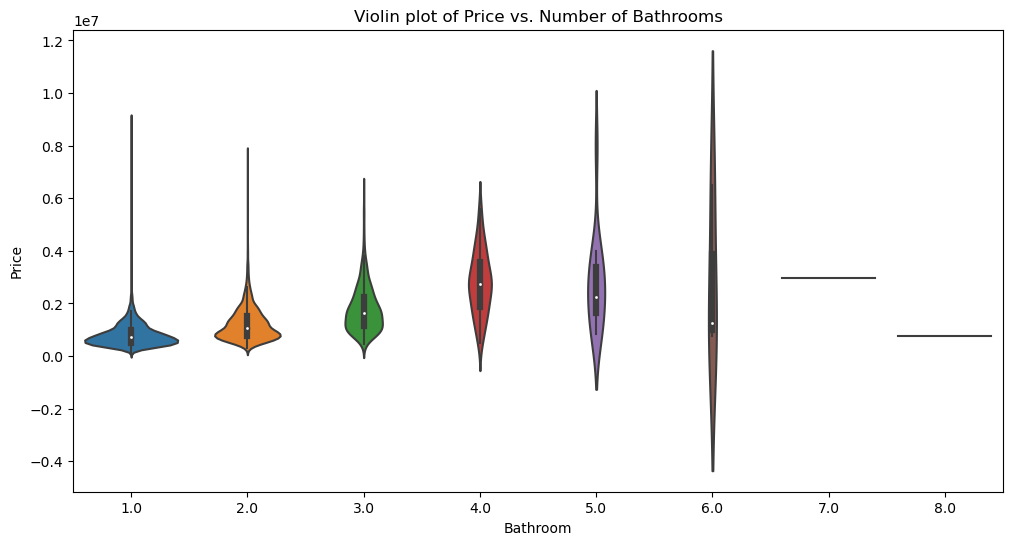

In [40]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Bathroom', y='Price', data=df)
plt.title('Violin plot of Price vs. Number of Bathrooms')
plt.show()

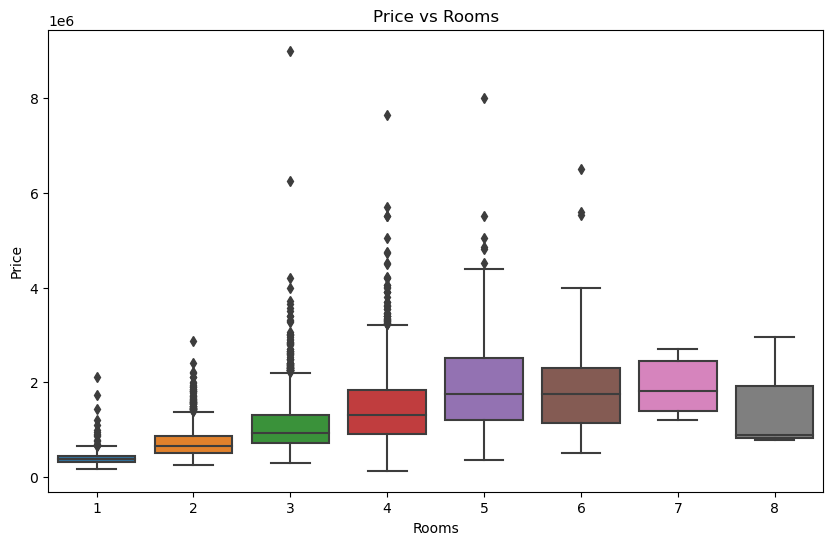

In [34]:
# Boxplot of Rooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rooms', y='Price', data=df)
plt.title('Price vs Rooms')
plt.show()


## Bivariate Analysis

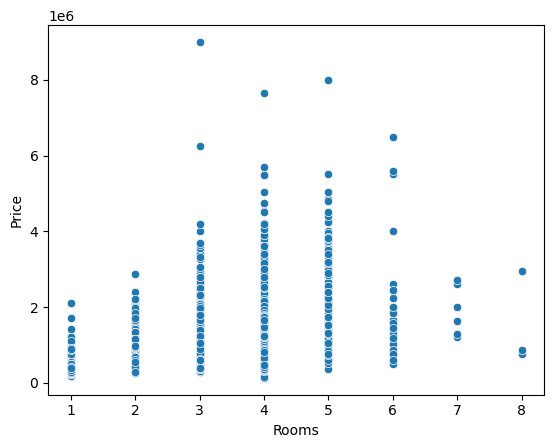

In [22]:
# Scatter plot for numerical values vs Target Variables
sns.scatterplot(x='Rooms', y='Price', data=df)
plt.show()


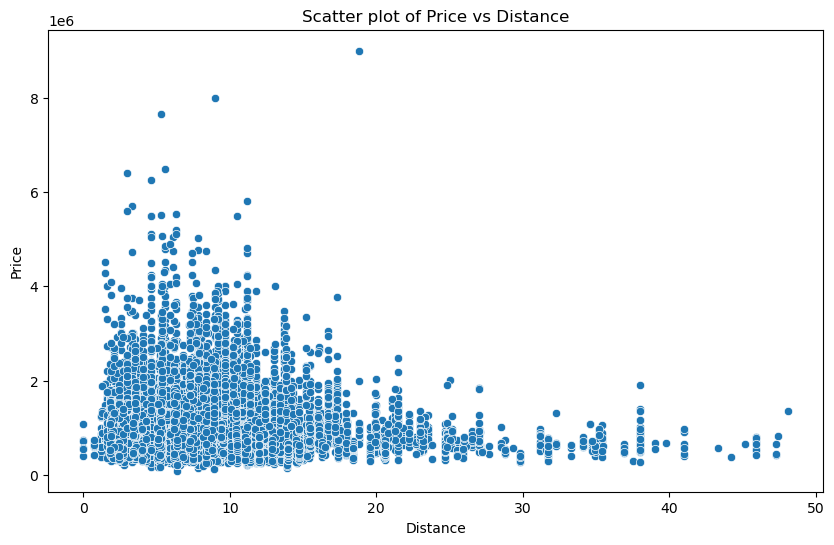

In [6]:
# Bivariate Analysis
# Let's assume you want to explore the relationship between 'price' and 'square_feet'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Price', data=df)
plt.title('Scatter plot of Price vs Distance')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

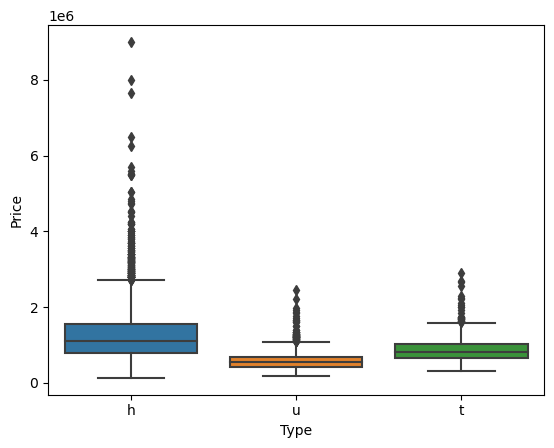

In [23]:
# Box Plot for categorical features vs Target Variables
sns.boxplot(x='Type', y='Price', data=df)
plt.show()


D:\Jupyter\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


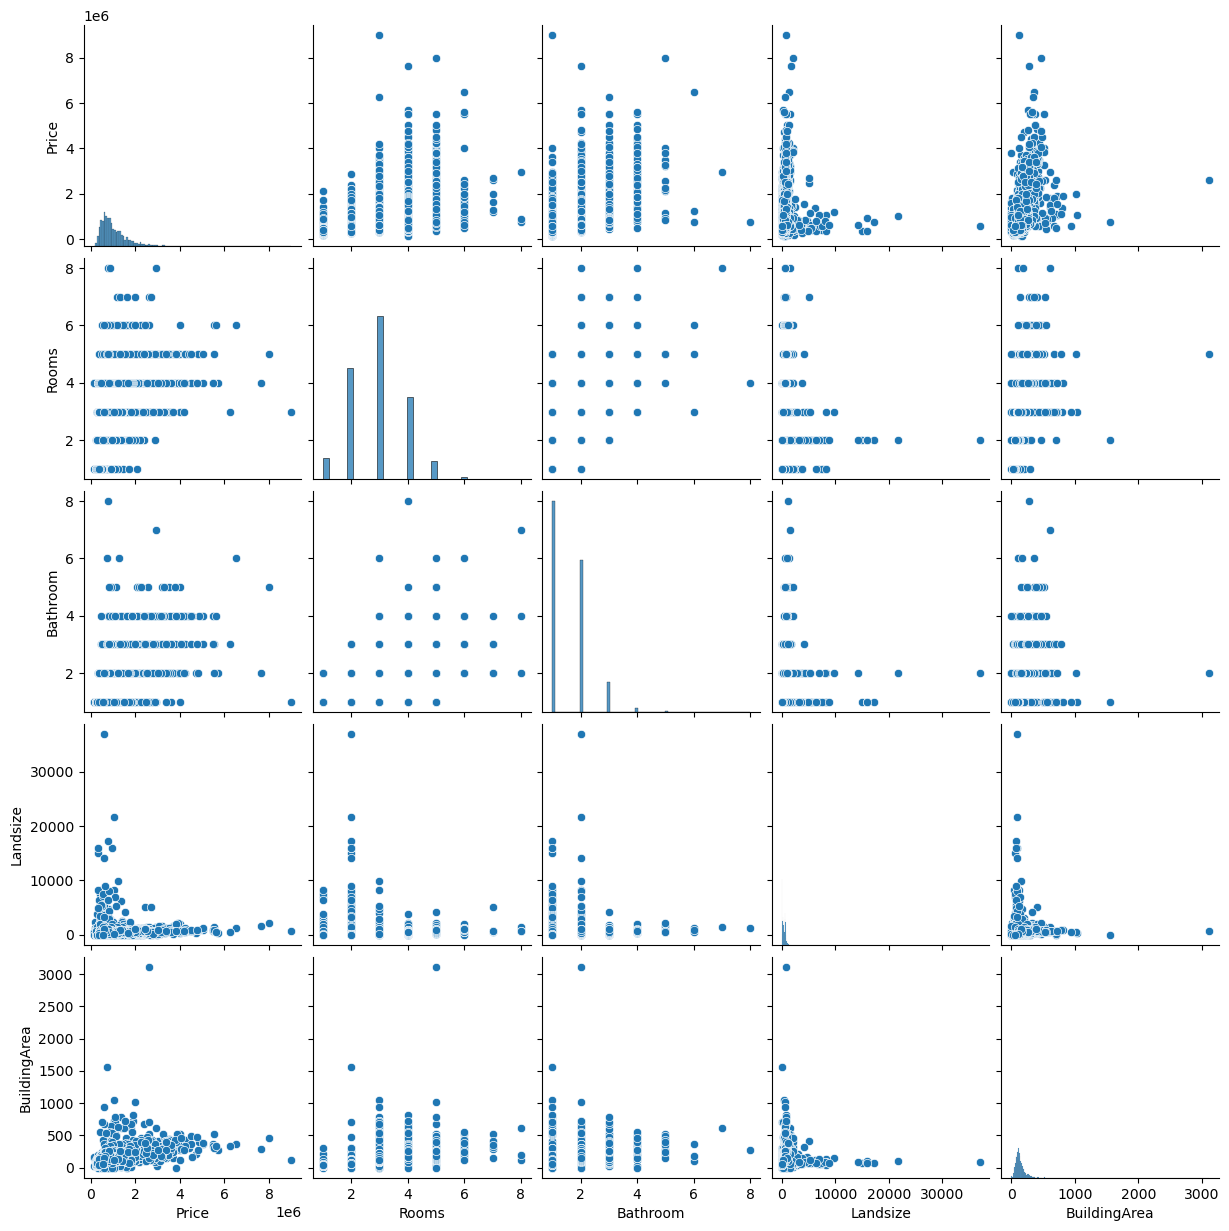

In [35]:
#Pairplot of selected features
selected_features = ['Price', 'Rooms', 'Bathroom', 'Landsize', 'BuildingArea']
sns.pairplot(df[selected_features])
plt.show()

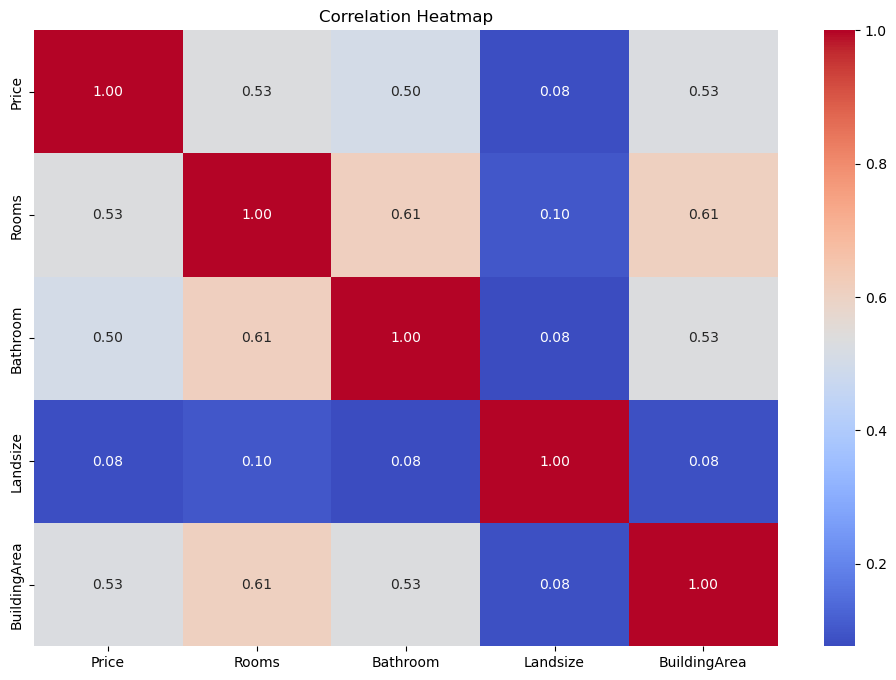

In [36]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[selected_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()